In [16]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### Part 1 - SVD Formula

In [17]:
def svd_from_eigendecomposition(A):
    #Formula to calculate the U, S, and V values
    ATA = A.T @ A
    eigenvalues, V = np.linalg.eigh(ATA)
    
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    V = V[:, sorted_indices]
    
    #Ensure no zero values are present in matrix to avoid potential errors
    singular_values = np.sqrt(eigenvalues.clip(min=0))
    singular_values[singular_values == 0] = 1e-10
    U = (A @ V) / singular_values
    
    return U, singular_values, V.T

In [18]:
def compute_svd_manual(matrix, p):
    #Function to do matrix multiplication for the U, S, and V values
    U, S, V = svd_from_eigendecomposition(matrix)
    S_k = np.diag(S[:p])
    U_k = U[:, :p]
    V_k = V[:p, :]
    return U_k @ S_k @ V_k

### Part 2 - Compress Color Image Utilizing SVD Formula

In [19]:
def compress_color_image(image_path, p):
    #Function to compress a color image
    img = Image.open(image_path)
    img = img.convert('RGB')
    img_array = np.array(img, dtype=np.float32)
    
    #Compute SVD for Red, Green and Blue Values
    compressed_channels = []
    for i in range(3):
        compressed_channel = compute_svd_manual(img_array[:, :, i], p)
        compressed_channels.append(compressed_channel.clip(0, 255).astype(np.uint8))
    
    #Stack together into a single matrix
    compressed_img = np.stack(compressed_channels, axis=-1)
    return compressed_img

In [20]:
#Calculate the compressed image
image_path = 'self_photo.jpg'
p = 10
compressed_image = compress_color_image(image_path, p)
original_image = Image.open(image_path).convert('RGB')
original_array = np.array(original_image, dtype=np.uint8)

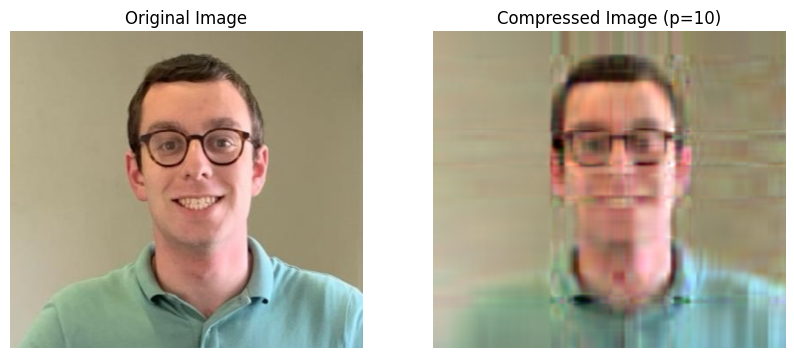

In [21]:
#Display the original and compressed images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(original_array)
axs[0].set_title('Original Image')
axs[0].axis('off')

axs[1].imshow(compressed_image)
axs[1].set_title(f'Compressed Image (p={p})')
axs[1].axis('off')

plt.show()

### Part 3 - Get Storage Memory Savings

In [22]:
#Find original image storage size
print(original_array.shape)
orignial_storage = original_array.shape[0] * original_array.shape[1] * original_array.shape[2]
print("Original Storage: ", orignial_storage)

(364, 405, 3)
Original Storage:  442260


In [23]:
print(compressed_image.shape[:2])

(364, 405)


In [24]:
U, S, V = svd_from_eigendecomposition(original_array[:, :, 0])    

In [25]:
#Find storage of compressed image
reconstimg_st=(np.shape(U[:, :p])[0]*np.shape(U[:, :p])[1]+np.shape(V[:p, :])[0]*np.shape(V[:p, :])[1])*3
print(reconstimg_st)

23070


In [26]:
print("Percenatge of Storage Memory =", reconstimg_st/orignial_storage)

Percenatge of Storage Memory = 0.05216388549721883


### Part 4 - Find Error of Compressed Matrix

In [27]:
#Take the difference of the original and compressed images
E = original_array - compressed_image

In [28]:
#Take the norm of the matrix to find the error and compare to max error
max_error = np.sqrt(np.prod(original_array.shape) * (255 ** 2))
error = np.linalg.norm(E)
print(max_error)
print(error)
print("Normalized Error:", error/max_error)

169581.7103935445
106276.37088741787
Normalized Error: 0.6266971281324187


### Part 5 - Putting It All Together

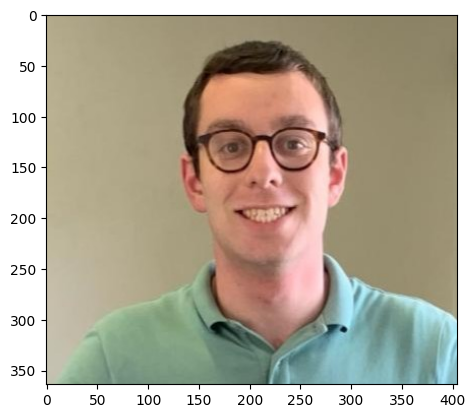

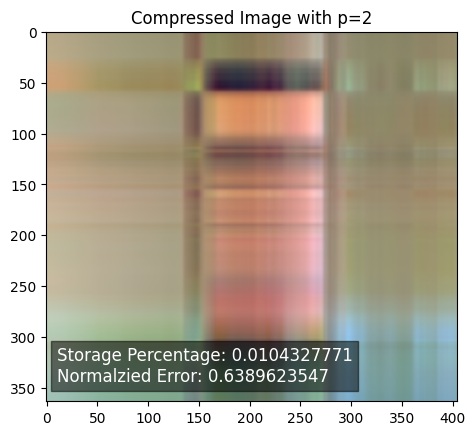

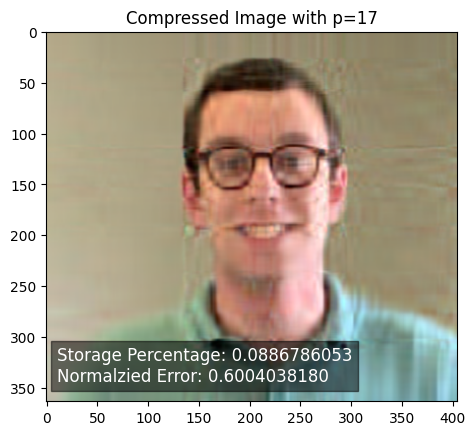

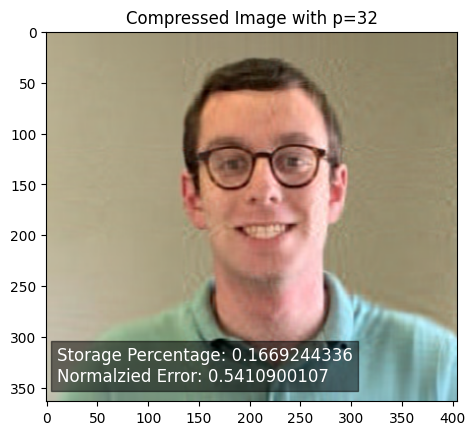

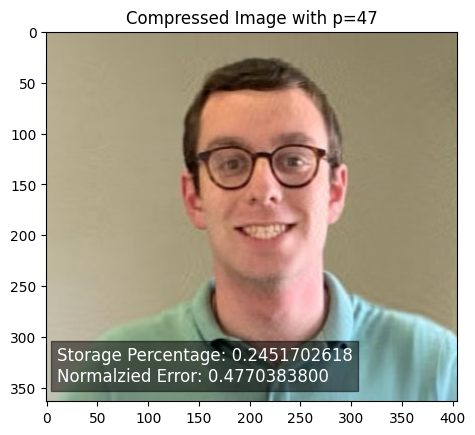

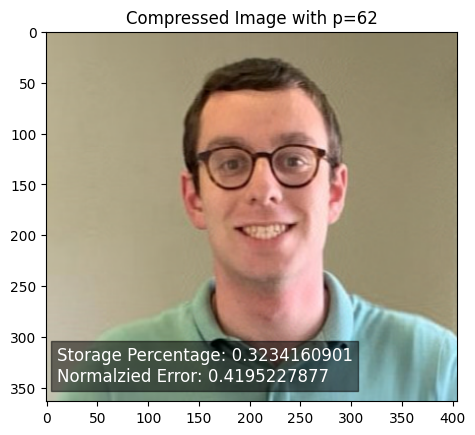

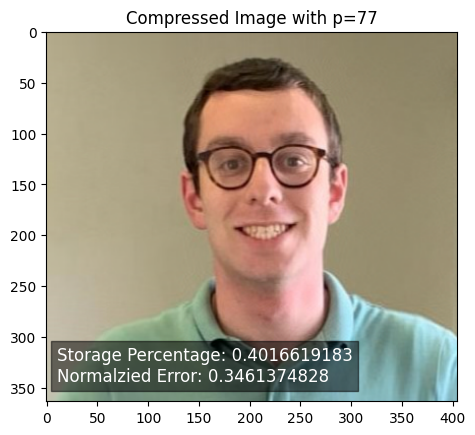

In [29]:
plt.imshow(original_array)
for p in range(2,80,15):
    #Get Compressed Image and U,S,V
    compressed_image_together = compress_color_image(image_path, p)
    U_t, S_t, V_t = svd_from_eigendecomposition(original_array[:, :, 0])

    #Get Storage Data for compressed image 
    reconstimg_together=(np.shape(U_t[:, :p])[0]*np.shape(U_t[:, :p])[1]+np.shape(V_t[:p, :])[0]*np.shape(V_t[:p, :])[1])*3

    #Find error of compressed image
    E_t = original_array - compressed_image_together
    error_together = np.linalg.norm(E_t)
    normalized_error_together = error_together/max_error

    #Plot results
    plt.figure()
    plt.imshow(compressed_image_together)
    plt.title(f"Compressed Image with p={p}")
    text = f"Storage Percentage: {reconstimg_together/orignial_storage:.10f}\nNormalzied Error: {normalized_error_together:.10f}"
    plt.text(10, compressed_image_together.shape[0] - 20, text, fontsize=12, color='white', bbox=dict(facecolor='black', alpha=0.5))
    plt.show()